# Criando objeto MNE

In [1]:
%run prepare.ipynb

Estruturas => dados (125, 257, 1205) labels (125,)
Características do voluntário: {'age': '25', 'capsize': 'Adult Medium', 'gender': 'Male', 'hairtype': 'Regular', 'handedness': 'Right'}

Rótulos: {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}

Taxa de amostragem: 250


In [2]:
import numpy as np
import mne
import matplotlib

# MNE Info descriptor

In [3]:
# objeto com o nome dos canais pelo modelo da touca utilizada
montage = mne.channels.make_standard_montage('EGI_256')

descriptor['sampling_rate'] = X.shape[-1] / 5
ch_types = 'eeg'

# criando o objeto `info` (o restante dos valores já temos)
info = mne.create_info(montage.ch_names,
                       sfreq=descriptor['sampling_rate'],
                       ch_types='eeg')
info.set_montage(montage)
info

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 256 EEG
 custom_ref_applied: False
 dig: 259 items (3 Cardinal, 256 EEG)
 highpass: 0.0 Hz
 lowpass: 120.5 Hz
 meas_date: unspecified
 nchan: 256
 projs: []
 sfreq: 241.0 Hz
>

# MNE Epoch

In [4]:
# o 257º eletrodo é o VREF (referência). Inútil -> Podemos tirá-lo...
X = X[:,:256,:]
# objeto event é uma matriz tridimensional conforme explicado em aula
events = np.array([[i, 0, e] for i, e in enumerate(y)])
# instanciando objeto EpochArray
epoch = mne.EpochsArray(X, info, events=events)
epoch

125 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<EpochsArray  |   125 events (all good), 0 - 4.99585 sec, baseline off, ~294.8 MB, data loaded,
 '1': 25
 '2': 25
 '3': 30
 '4': 25
 '5': 20>

In [25]:
# Filtrando apenas dados dos eletrodos f1, fz e f2
epoch_ex = epoch.copy().pick_channels(['E23', 'E15', 'E6'])
epoch_ex

<EpochsArray  |   125 events (all good), 0 - 4.99585 sec, baseline off, ~3.6 MB, data loaded,
 '1': 25
 '2': 25
 '3': 30
 '4': 25
 '5': 20>

In [6]:
print(epoch.get_data().shape)
print(epoch_ex.get_data().shape)

(125, 256, 1205)
(125, 3, 1205)


In [28]:
epoch_ex.filter(l_freq=6.0, h_freq=12.0)

Setting up band-pass filter from 6 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 6.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 399 samples (1.656 sec)



<EpochsArray  |   125 events (all good), 0 - 4.99585 sec, baseline off, ~3.6 MB, data loaded,
 '1': 25
 '2': 25
 '3': 30
 '4': 25
 '5': 20>

    Using multitaper spectrum estimation with 7 DPSS windows


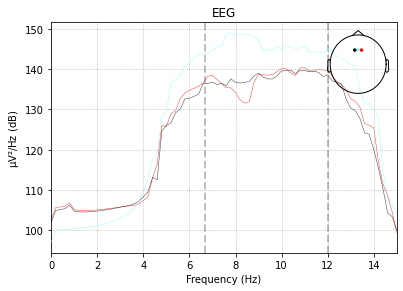

    Using multitaper spectrum estimation with 7 DPSS windows


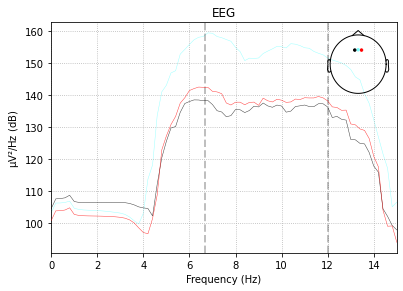

    Using multitaper spectrum estimation with 7 DPSS windows


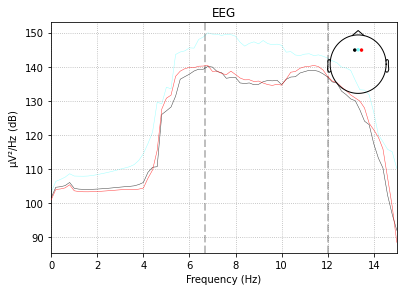

    Using multitaper spectrum estimation with 7 DPSS windows


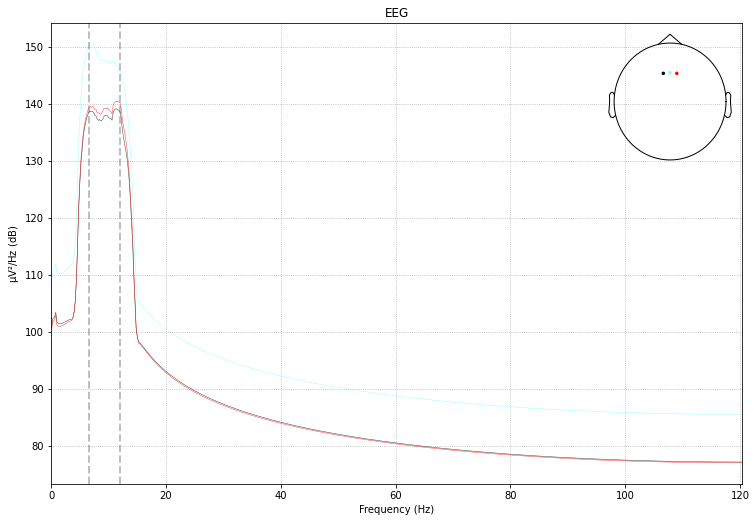

In [29]:
matplotlib.rcParams['figure.figsize'] = [6., 4.]

# escolhendo (filtrando) somente o evento '1'
e = '1'
# selecionando alguns trials aleatórios (3, 9 e 11)
for i in (3, 9, 11):
    epoch_ex[e][-i].plot_psd(fmin=0.00, fmax=15.0)
# mostrando todos os trials do evento '1'
matplotlib.rcParams['figure.figsize'] = [12., 8.]
epoch_ex[e].plot_psd()
print()

# Salvando Objeto MNE

In [8]:
epoch.save('ssvep-epo.fif', overwrite=True)

In [9]:
epoch_load = mne.read_epochs('ssvep-epo.fif')

Reading ssvep-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    4995.85 ms
        0 CTF compensation matrices available
125 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


In [10]:
print(type(epoch), type(epoch_load))

<class 'mne.epochs.EpochsArray'> <class 'mne.epochs.EpochsFIF'>
